In [1]:
from tqdm import tqdm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('anime_dataset.csv')

# Data Preprocessing

In [4]:
df.head()

,id,title,type,source,episodes,status,airing,duration,rating,score,...,themes,demographics,synopsis,background,producers,licensors,broadcast,related_anime,opening_themes,ending_themes
0,1,Cowboy Bebop,TV,Original,26.0,Finished Airing,False,24 min per ep,R - 17+ (violence & profanity),8.75,...,"['Adult Cast', 'Space']",[],"Crime is timeless. By the year 2071, humanity ...",When Cowboy Bebop first aired in spring of 199...,"['Bandai Visual', 'Victor Entertainment', 'Aud...",['Funimation'],Saturdays at 01:00 (JST),[],[],[]
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,Original,1.0,Finished Airing,False,1 hr 55 min,R - 17+ (violence & profanity),8.38,...,"['Adult Cast', 'Space']",[],"Another day, another bounty—such is the life o...",NaN,"['Sunrise', 'Bandai Visual']","['Sony Pictures Entertainment', 'Funimation']",NaN,[],[],[]
2,6,Trigun,TV,Manga,26.0,Finished Airing,False,24 min per ep,PG-13 - Teens 13 or older,8.22,...,['Adult Cast'],['Shounen'],"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,['Victor Entertainment'],['Funimation'],Thursdays at 01:15 (JST),[],[],[]
3,7,Witch Hunter Robin,TV,Original,26.0,Finished Airing,False,25 min per ep,PG-13 - Teens 13 or older,7.24,...,['Detective'],[],"Though hidden away from the general public, Wi...",NaN,"['Bandai Visual', 'Dentsu', 'Victor Entertainm...","['Funimation', 'Bandai Entertainment']",Wednesdays at 01:25 (JST),[],[],[]
4,8,Bouken Ou Beet,TV,Manga,52.0,Finished Airing,False,23 min per ep,PG - Children,6.93,...,[],['Shounen'],It is the dark century and the people are suff...,NaN,"['TV Tokyo', 'Dentsu']",['Illumitoon Entertainment'],Thursdays at 18:30 (JST),[],[],[]


In [5]:
df.head().T

,0,1,2,3,4
id,1,5,6,7,8
title,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet
type,TV,Movie,TV,TV,TV
source,Original,Original,Manga,Original,Manga
episodes,26.0,1.0,26.0,26.0,52.0
status,Finished Airing,Finished Airing,Finished Airing,Finished Airing,Finished Airing
airing,False,False,False,False,False
duration,24 min per ep,1 hr 55 min,24 min per ep,25 min per ep,23 min per ep
rating,R - 17+ (violence & profanity),R - 17+ (violence & profanity),PG-13 - Teens 13 or older,PG-13 - Teens 13 or older,PG - Children
score,8.75,8.38,8.22,7.24,6.93


In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[1 5 6 7 8]
27835

title
['Cowboy Bebop' 'Cowboy Bebop: Tengoku no Tobira' 'Trigun'
 'Witch Hunter Robin' 'Bouken Ou Beet']
27832

type
['TV' 'Movie' 'OVA' 'TV Special' 'Special']
9

source
['Original' 'Manga' 'Light novel' 'Game' 'Visual novel']
17

episodes
[ 26.   1.  52. 145.  24.]
255

status
['Finished Airing' 'Currently Airing' 'Not yet aired']
3

airing
[False  True]
2

duration
['24 min per ep' '1 hr 55 min' '25 min per ep' '23 min per ep'
 '27 min per ep']
338

rating
['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'PG - Children' 'R+ - Mild Nudity' 'G - All Ages']
6

score
[8.75 8.38 8.22 7.24 6.93]
561

scored_by
[999441. 221785. 383378.  44880.   6910.]
9024

rank
[  46.  212.  372. 3154. 4650.]
16388

popularity
[  43  635  259 1922 5557]
21362

members
[1934663  390832  789160  120953   16087]
11927

favorites
[85036  1660 16536   657    16]
1921

year
[1998.   nan 2002. 2004. 2005.]
66

season
['spring' nan 'summer' 'fall' 'winter']
4

studios
["['Sunr

### Dropping Columns with No Values

Columns `related_anime`, `opening_themes`, and `ending_themes` were dropped as they contained no meaningful values.

In [7]:
df = df.drop(columns=['related_anime', 'opening_themes', 'ending_themes'])

In [8]:
df.dtypes

id                int64
title            object
type             object
source           object
episodes        float64
status           object
airing             bool
duration         object
rating           object
score           float64
scored_by       float64
rank            float64
popularity        int64
members           int64
favorites         int64
year            float64
season           object
studios          object
genres           object
themes           object
demographics     object
synopsis         object
background       object
producers        object
licensors        object
broadcast        object
dtype: object

In [9]:
df.shape

(27969, 26)

In [10]:
df.isnull().sum()

id                  0
title               0
type               81
source              0
episodes          688
status              0
airing              0
duration            0
rating            597
score            9927
scored_by        9927
rank             6562
popularity          0
members             0
favorites           0
year            21932
season          21932
studios             0
genres              0
themes              0
demographics        0
synopsis         4971
background      25148
producers           0
licensors           0
broadcast       19767
dtype: int64

In [11]:
df.head().T

,0,1,2,3,4
id,1,5,6,7,8
title,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet
type,TV,Movie,TV,TV,TV
source,Original,Original,Manga,Original,Manga
episodes,26.0,1.0,26.0,26.0,52.0
status,Finished Airing,Finished Airing,Finished Airing,Finished Airing,Finished Airing
airing,False,False,False,False,False
duration,24 min per ep,1 hr 55 min,24 min per ep,25 min per ep,23 min per ep
rating,R - 17+ (violence & profanity),R - 17+ (violence & profanity),PG-13 - Teens 13 or older,PG-13 - Teens 13 or older,PG - Children
score,8.75,8.38,8.22,7.24,6.93


In [12]:
columns_to_process = ['studios', 'genres', 'themes', 'demographics', 'producers', 'licensors']

for col in columns_to_process:
    df[col] = df[col].apply(
        lambda x: ','.join(item.strip() for item in eval(x)) if isinstance(x, str) and x.startswith('[') and len(eval(x)) > 0 else np.nan
    )

In [13]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

id               0.000000
title            0.000000
type             0.289606
source           0.000000
episodes         2.459866
status           0.000000
airing           0.000000
duration         0.000000
rating           2.134506
score           35.492867
scored_by       35.492867
rank            23.461690
popularity       0.000000
members          0.000000
favorites        0.000000
year            78.415388
season          78.415388
studios         41.141979
genres          20.615682
themes          41.374379
demographics    62.340448
synopsis        17.773249
background      89.913833
producers       52.686903
licensors       82.055132
broadcast       70.674676
dtype: float64


In [14]:
df = df.drop(columns=missing_percentage[missing_percentage > 60].index)

### Dropping Columns with Over 60% Missing Values

Columns `year`, `season`, `demographics`, `background`, `licensors` and `broadcast` were dropped as they had over 70% missing values, making them unsuitable for analysis.

In [15]:
df.isnull().sum()

id                0
title             0
type             81
source            0
episodes        688
status            0
airing            0
duration          0
rating          597
score          9927
scored_by      9927
rank           6562
popularity        0
members           0
favorites         0
studios       11507
genres         5766
themes        11572
synopsis       4971
producers     14736
dtype: int64

In [16]:
df.shape

(27969, 20)

In [17]:
df[df['status']== 'Not yet aired'].isnull().sum()

id              0
title           0
type           80
source          0
episodes      429
status          0
airing          0
duration        0
rating        292
score         543
scored_by     543
rank          543
popularity      0
members         0
favorites       0
studios       249
genres         39
themes        193
synopsis       78
producers     305
dtype: int64

In [18]:
columns_to_fill = ['producers', 'studios', 'genres', 'themes']

# Replace NaN with "Unknown"
for col in columns_to_fill:
    df[col] = df[col].fillna('Unknown')

### Replacing Missing Values with "Unknown"

Missing values in the `producers`, `genres`, `themes`, and `studios` columns are replaced with `"Unknown"`. This preserves all data while explicitly indicating missing information.

In [19]:
def create_success_target(row):
    conditions = [
        row['score'] > 7.5 if pd.notnull(row['score']) else True,  # Ignore if null
        row['scored_by'] > 100000 if pd.notnull(row['scored_by']) else True,  # Ignore if null
        row['popularity'] < 1000 if pd.notnull(row['popularity']) else True,  # Ignore if null
        row['members'] > 100000 if pd.notnull(row['members']) else True,  # Ignore if null
        row['favorites'] > 1000 if pd.notnull(row['favorites']) else True,  # Ignore if null
        row['rank'] < 1000 if pd.notnull(row['rank']) else True # Ignore if null
    ]
    return 1 if all(conditions) else 0

In [20]:
df['success'] = df.apply(create_success_target, axis=1)

In [21]:
df['success'].value_counts()

success
0    27541
1      428
Name: count, dtype: int64

In [22]:
df[df['success']==1].head()

,id,title,type,source,episodes,status,airing,duration,rating,score,...,rank,popularity,members,favorites,studios,genres,themes,synopsis,producers,success
0,1,Cowboy Bebop,TV,Original,26.0,Finished Airing,False,24 min per ep,R - 17+ (violence & profanity),8.75,...,46.0,43,1934663,85036,Sunrise,"Action,Award Winning,Sci-Fi","Adult Cast,Space","Crime is timeless. By the year 2071, humanity ...","Bandai Visual,Victor Entertainment,Audio Plann...",1
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,Original,1.0,Finished Airing,False,1 hr 55 min,R - 17+ (violence & profanity),8.38,...,212.0,635,390832,1660,Bones,"Action,Sci-Fi","Adult Cast,Space","Another day, another bounty—such is the life o...","Sunrise,Bandai Visual",1
2,6,Trigun,TV,Manga,26.0,Finished Airing,False,24 min per ep,PG-13 - Teens 13 or older,8.22,...,372.0,259,789160,16536,Madhouse,"Action,Adventure,Sci-Fi",Adult Cast,"Vash the Stampede is the man with a $$60,000,0...",Victor Entertainment,1
9,19,Monster,TV,Manga,74.0,Finished Airing,False,24 min per ep,R+ - Mild Nudity,8.88,...,24.0,126,1195626,56146,Madhouse,"Drama,Mystery,Suspense","Adult Cast,Psychological","Dr. Kenzou Tenma, an elite neurosurgeon recent...","VAP,Shogakukan-Shueisha Productions,Nippon Tel...",1
10,20,Naruto,TV,Manga,220.0,Finished Airing,False,23 min per ep,PG-13 - Teens 13 or older,8.00,...,673.0,9,2946998,81902,Pierrot,"Action,Adventure,Fantasy",Martial Arts,"Moments before Naruto Uzumaki's birth, a huge ...","TV Tokyo,Aniplex,Shueisha",1


### Creating Target Variable

The target variable `success` is created based on multiple conditions: `score > 7.5`, `scored_by > 100,000`, `popularity < 1000`, `members > 100,000`, `favorites > 1,000` and `rank < 1000`. An anime meeting all these conditions is marked as successful (`1`), otherwise not (`0`).

In [23]:
df = df.drop(columns=['score', 'scored_by', 'popularity', 'members', 'favorites', 'rank'])

### Dropping Columns Used for Target Creation

The columns `score`, `scored_by`, `popularity`, `members`,`favorites` and `rank` are dropped as they were used to create the `success` target variable and are not needed for model training.

In [24]:
df.isnull().sum()

id              0
title           0
type           81
source          0
episodes      688
status          0
airing          0
duration        0
rating        597
studios         0
genres          0
themes          0
synopsis     4971
producers       0
success         0
dtype: int64

In [25]:
df.shape

(27969, 15)

In [26]:
df['type'] = df['type'].fillna(df['type'].mode()[0])

In [27]:
df['episodes'] = df['episodes'].fillna(df['episodes'].median())

In [28]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [29]:
df['synopsis'] = df['synopsis'].fillna("No synopsis available")

### Handling Missing Values in the Dataset

- **`type`**: Imputed with the most frequent value (mode) to handle 81 missing values.
- **`episodes`**: Imputed with the median to handle 688 missing values.
- **`rating`**: Imputed with the most frequent value (mode) to handle 597 missing values.
- **`synopsis`**: Filled with "No synopsis available" to handle 4971 missing values.

This ensures no rows or columns are dropped, retaining the maximum amount of data for analysis.

In [30]:
df.isnull().sum()

id           0
title        0
type         0
source       0
episodes     0
status       0
airing       0
duration     0
rating       0
studios      0
genres       0
themes       0
synopsis     0
producers    0
success      0
dtype: int64

In [31]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[1 5 6 7 8]
27835

title
['Cowboy Bebop' 'Cowboy Bebop: Tengoku no Tobira' 'Trigun'
 'Witch Hunter Robin' 'Bouken Ou Beet']
27832

type
['TV' 'Movie' 'OVA' 'TV Special' 'Special']
9

source
['Original' 'Manga' 'Light novel' 'Game' 'Visual novel']
17

episodes
[ 26.   1.  52. 145.  24.]
255

status
['Finished Airing' 'Currently Airing' 'Not yet aired']
3

airing
[False  True]
2

duration
['24 min per ep' '1 hr 55 min' '25 min per ep' '23 min per ep'
 '27 min per ep']
338

rating
['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'PG - Children' 'R+ - Mild Nudity' 'G - All Ages']
6

studios
['Sunrise' 'Bones' 'Madhouse' 'Toei Animation' 'Gallop']
1802

genres
['Action,Award Winning,Sci-Fi' 'Action,Sci-Fi' 'Action,Adventure,Sci-Fi'
 'Action,Drama,Mystery,Supernatural' 'Action,Adventure,Fantasy']
956

themes
['Adult Cast,Space' 'Adult Cast' 'Detective' 'Unknown' 'Team Sports']
1014

synopsis
["Crime is timeless. By the year 2071, humanity has expanded across the galaxy, fill

In [32]:
df.head().T

,0,1,2,3,4
id,1,5,6,7,8
title,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet
type,TV,Movie,TV,TV,TV
source,Original,Original,Manga,Original,Manga
episodes,26.0,1.0,26.0,26.0,52.0
status,Finished Airing,Finished Airing,Finished Airing,Finished Airing,Finished Airing
airing,False,False,False,False,False
duration,24 min per ep,1 hr 55 min,24 min per ep,25 min per ep,23 min per ep
rating,R - 17+ (violence & profanity),R - 17+ (violence & profanity),PG-13 - Teens 13 or older,PG-13 - Teens 13 or older,PG - Children
studios,Sunrise,Bones,Madhouse,Sunrise,Toei Animation


# Feature Engineering

In [33]:
import re

def parse_duration(duration):
    match = re.search(r'(?:(\d+)\s*hr)?\s*(\d+)\s*min', duration)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return None 


df['duration_minutes'] = df['duration'].apply(parse_duration)

In [34]:
df.isnull().sum()

id                     0
title                  0
type                   0
source                 0
episodes               0
status                 0
airing                 0
duration               0
rating                 0
studios                0
genres                 0
themes                 0
synopsis               0
producers              0
success                0
duration_minutes    1636
dtype: int64

In [35]:
median_duration_by_type = df.groupby('type')['duration_minutes'].median()

# Replace NaN in duration_minutes with the median value for the corresponding type
df['duration_minutes'] = df.apply(
    lambda row: median_duration_by_type[row['type']] if pd.isnull(row['duration_minutes']) else row['duration_minutes'],
    axis=1
)

In [36]:
df.drop(columns=['duration'], inplace=True)

In [37]:
df.isnull().sum()

id                  0
title               0
type                0
source              0
episodes            0
status              0
airing              0
rating              0
studios             0
genres              0
themes              0
synopsis            0
producers           0
success             0
duration_minutes    0
dtype: int64

### Imputing Missing `duration_minutes` Based on `type`

The `duration_minutes` column had missing values for certain rows. These were imputed by calculating the median `duration_minutes` for each `type` (e.g., TV, Movie). For rows with missing values, the corresponding median value based on `type` was used, ensuring a context-aware and robust imputation.

In [38]:
df['synopsis_length'] = df['synopsis'].apply(len)

In [39]:
df.drop(columns=['synopsis'], inplace=True)

### Extracting `synopsis_length` and Dropping `synopsis`

The length of the `synopsis` column was extracted as a new feature, `synopsis_length`, to capture the richness of the anime's description.

In [40]:
df.head().T

,0,1,2,3,4
id,1,5,6,7,8
title,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet
type,TV,Movie,TV,TV,TV
source,Original,Original,Manga,Original,Manga
episodes,26.0,1.0,26.0,26.0,52.0
status,Finished Airing,Finished Airing,Finished Airing,Finished Airing,Finished Airing
airing,False,False,False,False,False
rating,R - 17+ (violence & profanity),R - 17+ (violence & profanity),PG-13 - Teens 13 or older,PG-13 - Teens 13 or older,PG - Children
studios,Sunrise,Bones,Madhouse,Sunrise,Toei Animation
genres,"Action,Award Winning,Sci-Fi","Action,Sci-Fi","Action,Adventure,Sci-Fi","Action,Drama,Mystery,Supernatural","Action,Adventure,Fantasy"


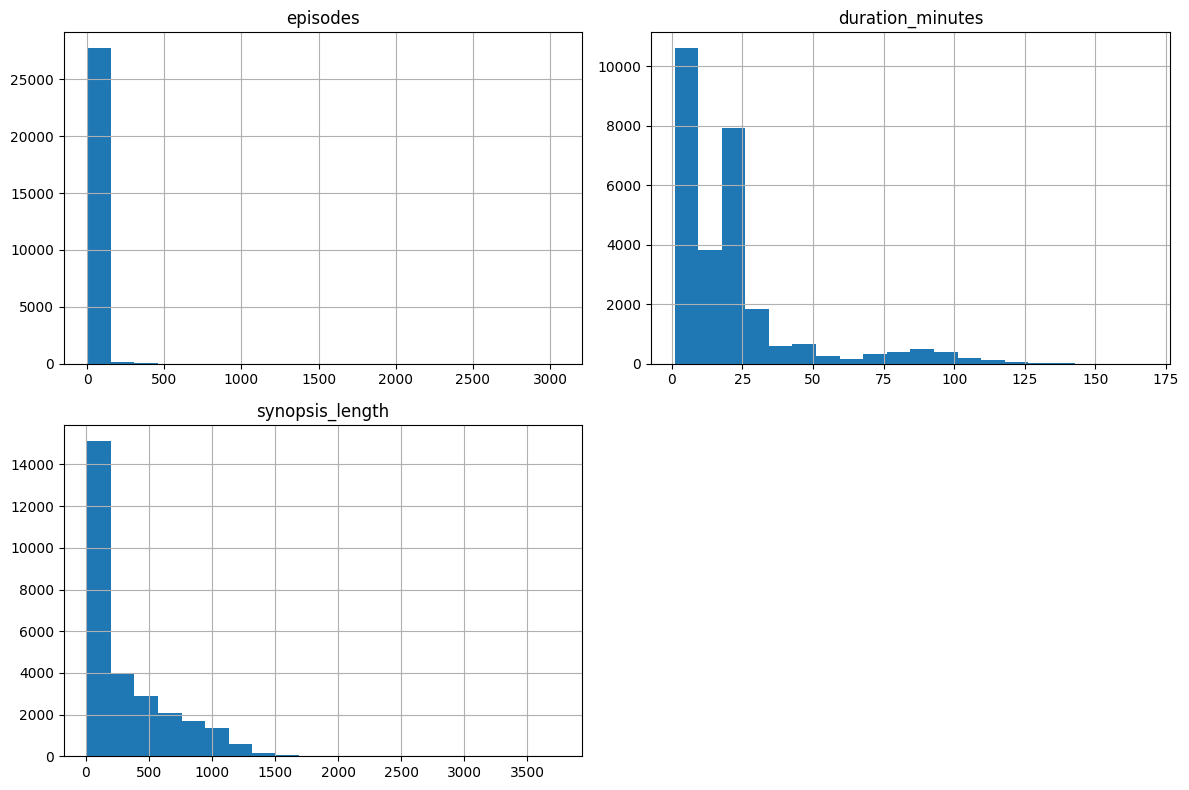

In [41]:
# Histogram
numerical_columns = ['episodes', 'duration_minutes', 'synopsis_length']
df[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

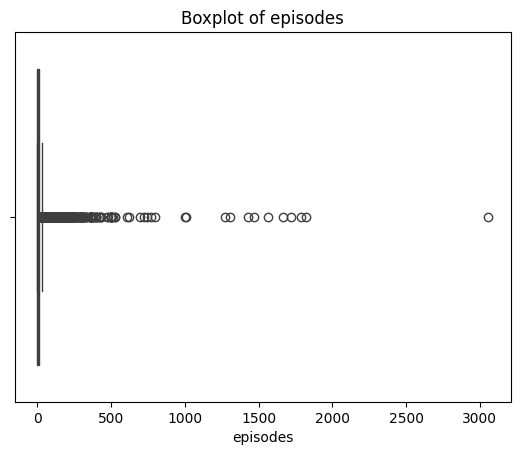

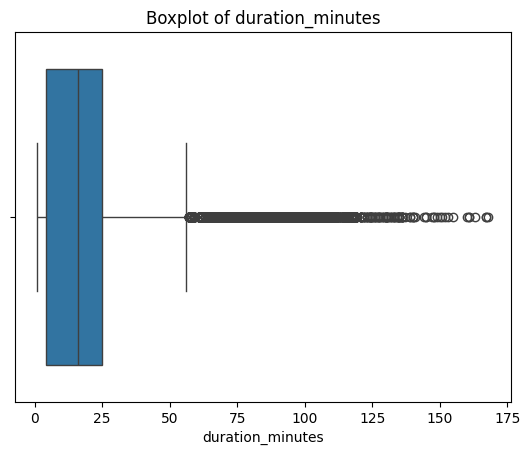

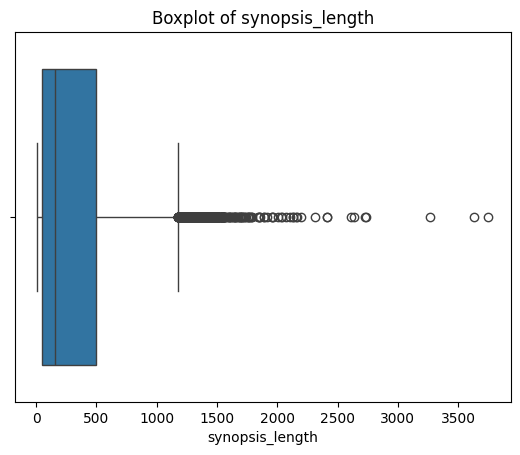

In [42]:
# Boxplot
for col in numerical_columns:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

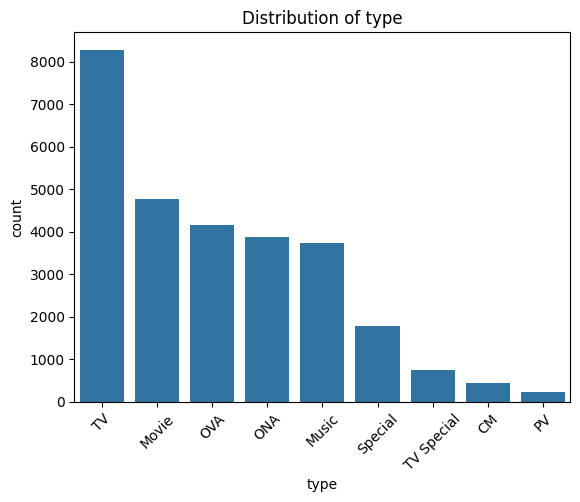

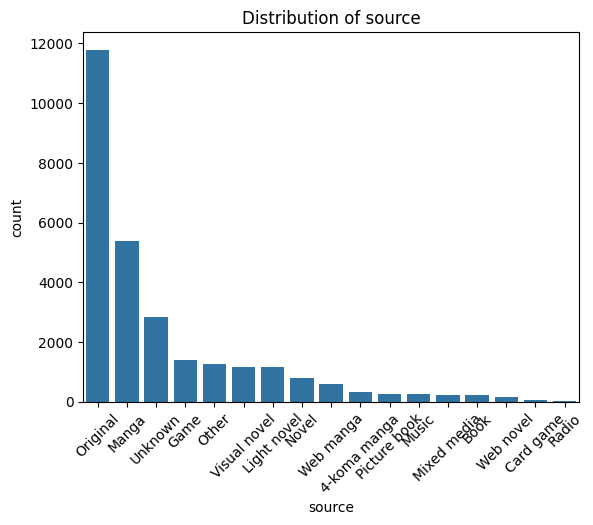

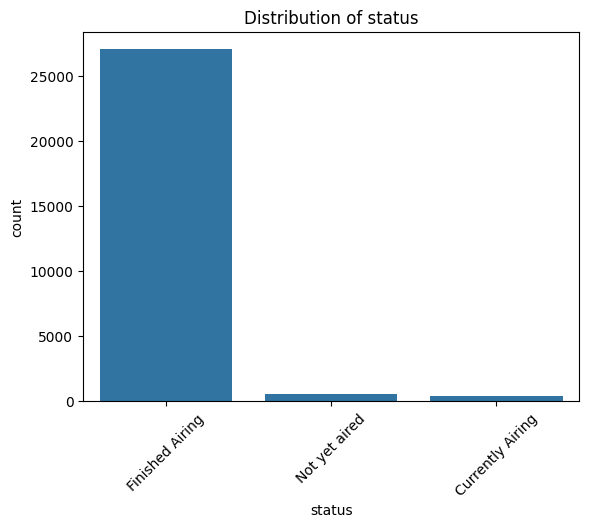

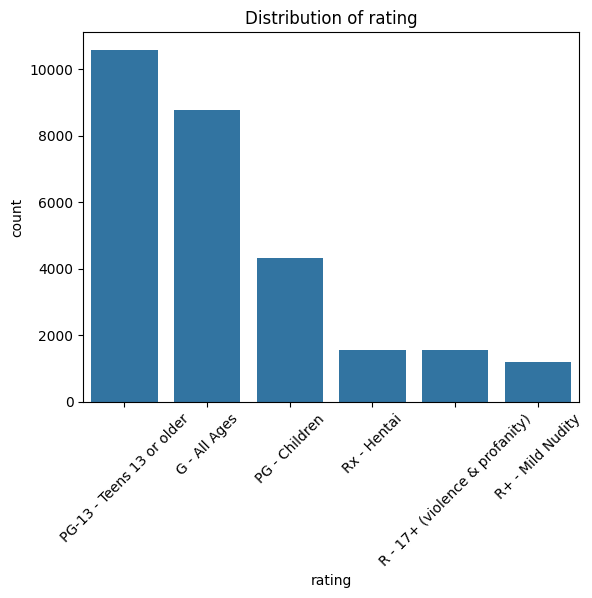

In [43]:
# Bar plot
categorical_columns = ['type', 'source', 'status', 'rating']
for col in categorical_columns:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [44]:
df.dtypes

id                    int64
title                object
type                 object
source               object
episodes            float64
status               object
airing                 bool
rating               object
studios              object
genres               object
themes               object
producers            object
success               int64
duration_minutes    float64
synopsis_length       int64
dtype: object

In [45]:
df.drop(columns=['airing'], inplace=True)

### Dropping the `airing` Column

The `airing` column was dropped because it duplicates the information already provided in the `status` column.

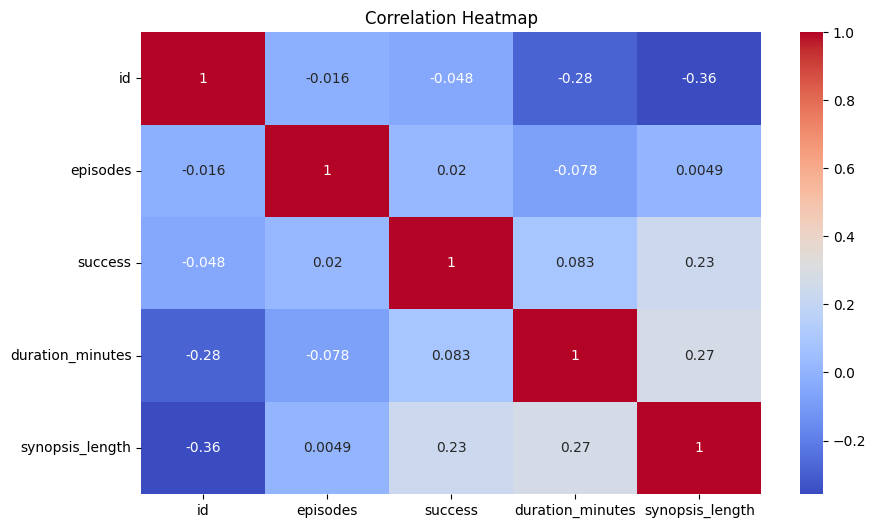

In [46]:
# Correlation heatmap
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap Analysis

1. **Low Correlation with `success`**:
   - Most features show weak correlation with the target variable (`success`), indicating that non-linear relationships may be more relevant.

2. **`synopsis_length`**:
   - Displays a moderate positive correlation with `success`, suggesting it may contribute to predicting the target.

3. **No Significant Multicollinearity**:
   - Features do not exhibit strong correlations with each other, so all features can be retained for modeling.

In [47]:
df.drop(columns=['title', 'id'], inplace=True)

### Dropping the `title` and `id` Columns

The `title` and `id` columns were dropped because they contain too many unique values, making it unsuitable for modeling without additional feature engineering.


In [48]:
df.head().T

,0,1,2,3,4
type,TV,Movie,TV,TV,TV
source,Original,Original,Manga,Original,Manga
episodes,26.0,1.0,26.0,26.0,52.0
status,Finished Airing,Finished Airing,Finished Airing,Finished Airing,Finished Airing
rating,R - 17+ (violence & profanity),R - 17+ (violence & profanity),PG-13 - Teens 13 or older,PG-13 - Teens 13 or older,PG - Children
studios,Sunrise,Bones,Madhouse,Sunrise,Toei Animation
genres,"Action,Award Winning,Sci-Fi","Action,Sci-Fi","Action,Adventure,Sci-Fi","Action,Drama,Mystery,Supernatural","Action,Adventure,Fantasy"
themes,"Adult Cast,Space","Adult Cast,Space",Adult Cast,Detective,Unknown
producers,"Bandai Visual,Victor Entertainment,Audio Plann...","Sunrise,Bandai Visual",Victor Entertainment,"Bandai Visual,Dentsu,Victor Entertainment","TV Tokyo,Dentsu"
success,1,1,1,0,0


In [49]:
from sklearn.metrics import mutual_info_score

categorical_features = ['type', 'source', 'status', 'rating', 'studios', 'genres', 'themes', 'producers']

def calculate_mutual_info(series):
    return mutual_info_score(series, df['success'])

# Calculate mutual information
mutual_info = df[categorical_features].apply(calculate_mutual_info)
mutual_info.sort_values(ascending=False, inplace=True)
print("Mutual Information Scores:")
print(mutual_info)

Mutual Information Scores:
producers    0.067449
studios      0.029449
genres       0.027785
themes       0.026023
rating       0.011876
type         0.010686
source       0.009986
status       0.000258
dtype: float64


### Mutual Information Scores
- **Producers** have the highest influence on `success`.
- Features like **studios**, **genres**, and **themes** also show moderate importance.
- **Status** has the least influence, indicating it provides minimal information about `success`.

# Setting up the validation framework

In [314]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(16781, 5594, 5594)

In [315]:
# Reset the index for train, validation, and test sets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [316]:
y_train = df_train.success.values
y_val = df_val.success.values
y_test = df_test.success.values

In [317]:
del df_train['success']
del df_val['success']
del df_test['success']

# One-hot encoding

In [318]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

categorical = ['type', 'source', 'status', 'rating', 'studios', 'genres', 'themes', 'producers']
numerical = ['episodes', 'duration_minutes', 'synopsis_length']

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [60]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("Classification Report:")
print(classification_report(y_val, y_pred))

print(f"AUC Score: {roc_auc_score(y_val, y_pred_proba)}")

Confusion Matrix:
[[5294  221]
 [  20   59]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5515
           1       0.21      0.75      0.33        79

    accuracy                           0.96      5594
   macro avg       0.60      0.85      0.65      5594
weighted avg       0.99      0.96      0.97      5594

AUC Score: 0.9734303453182919


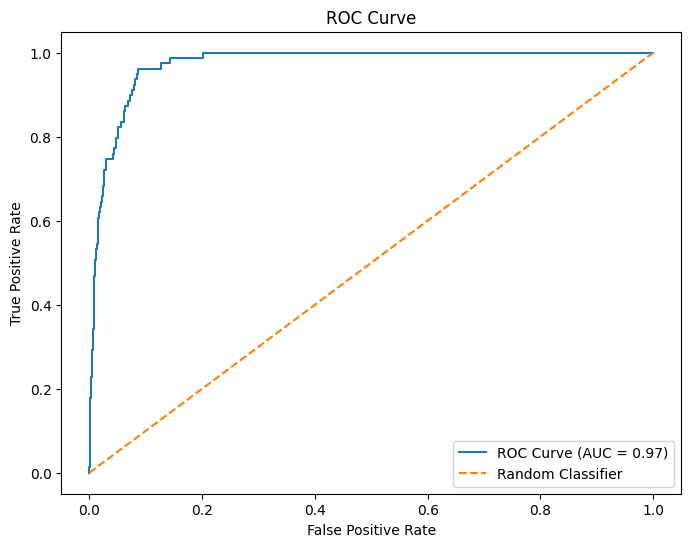

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_val, y_pred_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [63]:
from sklearn.model_selection import cross_val_score

# Cross-validation AUC scores
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean CV AUC Score: {cv_scores.mean()}")

/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross-Validation AUC Scores: [0.96389503 0.97291092 0.97222481 0.96667792 0.97665999]
Mean CV AUC Score: 0.9704737342601379


/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Grid Search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best AUC Score: {grid_search.best_score_}")

/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best AUC Score: 0.9708230822887138


### Using SMOTE for Imbalanced Data

In [102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [69]:
log_reg_resampled = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [103]:
y_pred_resampled = log_reg_resampled.predict(X_val)
y_pred_proba_resampled = log_reg_resampled.predict_proba(X_val)[:, 1]

In [76]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_resampled))

Confusion Matrix:
[[5388  127]
 [  23   56]]


In [74]:
print("Classification Report:")
print(classification_report(y_val, y_pred_resampled))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5515
           1       0.31      0.71      0.43        79

    accuracy                           0.97      5594
   macro avg       0.65      0.84      0.71      5594
weighted avg       0.99      0.97      0.98      5594



In [73]:
print(f"AUC Score: {roc_auc_score(y_val, y_pred_proba_resampled)}")

AUC Score: 0.9740316972124355


In [77]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Grid Search on resampled data (after applying SMOTE)
grid_search_smote = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
                                 param_grid, scoring='roc_auc', cv=5)

grid_search_smote.fit(X_train_resampled, y_train_resampled)

# Best Parameters from Grid Search with SMOTE
print(f"Best Parameters from Grid Search with SMOTE: {grid_search_smote.best_params_}")
print(f"Best AUC Score from Grid Search with SMOTE: {grid_search_smote.best_score_}")

/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Best Parameters from Grid Search with SMOTE: {'C': 10, 'solver': 'liblinear'}
Best AUC Score from Grid Search with SMOTE: 0.9975499846628854


In [82]:
best_model_smote = grid_search_smote.best_estimator_

y_val_pred = best_model_smote.predict(X_val)
y_val_pred_proba = best_model_smote.predict_proba(X_val)[:, 1]

print("Confusion Matrix on Validation Set:")
print(confusion_matrix(y_val, y_val_pred))

print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

print(f"AUC Score on Validation Set: {roc_auc_score(y_val, y_val_pred_proba)}")

Confusion Matrix on Validation Set:
[[5397  118]
 [  28   51]]
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5515
           1       0.30      0.65      0.41        79

    accuracy                           0.97      5594
   macro avg       0.65      0.81      0.70      5594
weighted avg       0.99      0.97      0.98      5594

AUC Score on Validation Set: 0.9730011361419375


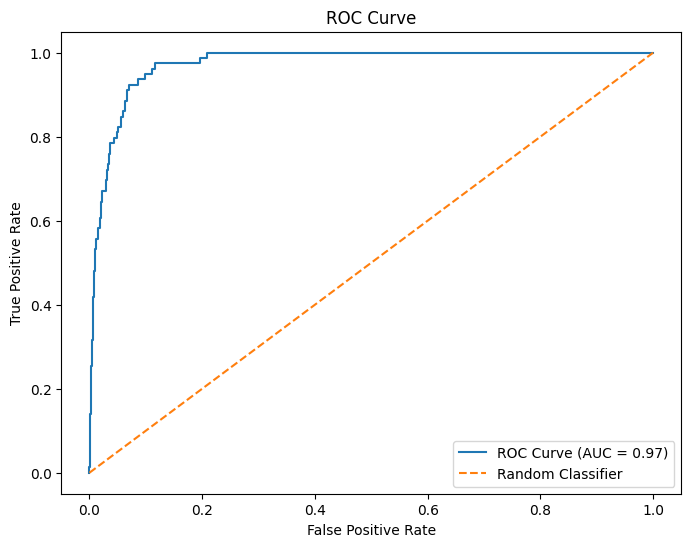

In [79]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_val, y_val_pred_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### SMOTE and Logistic Regression:

In certain cases, SMOTE (Synthetic Minority Over-sampling Technique) can improve the performance of logistic regression, particularly when class imbalance is present. When there is a significant imbalance between the majority and minority classes, models like logistic regression tend to bias predictions toward the majority class, leading to poor performance on the minority class.

#### Without Parameter Tuning:

For logistic regression, applying SMOTE without parameter tuning has shown to improve performance. This is because SMOTE generates synthetic samples from the minority class, which helps the model learn better about the minority class and predict it more accurately. As a result, metrics like recall, precision, and F1-score for the minority class tend to improve.

Unlike more complex models like XGBoost, logistic regression can benefit more directly from SMOTE due to its simpler nature, which makes it more sensitive to imbalances. This is why using SMOTE without parameter tuning can sometimes be a quick and effective solution.

#### About Overfitting:

When parameter tuning was applied to the logistic regression model, it resulted in **worse performance** compared to the model without tuning. This suggests that **parameter tuning led to overfitting**, where the model became too sensitive to the resampled data, especially the synthetic samples generated by SMOTE. As a result, the model's ability to generalize to unseen data was compromised, which led to lower performance on the validation set. Therefore, the decision to proceed without parameter tuning worked better in this case, as it avoided overfitting while still addressing the class imbalance effectively.

# XGBoost using GPU

In [126]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'tree_method': 'hist',
    'gpu_id': 0,
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds=10)

y_val_pred_proba = xgb_model.predict(dval)

auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC Score for XGBoost (GPU): {auc}")

/home/starlord/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [01:54:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	eval-auc:0.89219
[1]	eval-auc:0.89364
[2]	eval-auc:0.89542
[3]	eval-auc:0.89495
[4]	eval-auc:0.93561
[5]	eval-auc:0.93899
[6]	eval-auc:0.94028
[7]	eval-auc:0.93905
[8]	eval-auc:0.93954
[9]	eval-auc:0.94063
[10]	eval-auc:0.94032
[11]	eval-auc:0.94026
[12]	eval-auc:0.94082
[13]	eval-auc:0.95745
[14]	eval-auc:0.95817
[15]	eval-auc:0.95858
[16]	eval-auc:0.96206
[17]	eval-auc:0.96215
[18]	eval-auc:0.96171
[19]	eval-auc:0.96166
[20]	eval-auc:0.96236
[21]	eval-auc:0.96253
[22]	eval-auc:0.96283
[23]	eval-auc:0.96297
[24]	eval-auc:0.96284
[25]	eval-auc:0.96310
[26]	eval-auc:0.96356
[27]	eval-auc:0.96405
[28]	eval-auc:0.96417
[29]	eval-auc:0.96438
[30]	eval-auc:0.96488
[31]	eval-auc:0.96531
[32]	eval-auc:0.96543
[33]	eval-auc:0.96579
[34]	eval-auc:0.96588
[35]	eval-auc:0.96609
[36]	eval-auc:0.96639
[37]	eval-auc:0.96671
[38]	eval-auc:0.96698
[39]	eval-auc:0.96710
[40]	eval-auc:0.96723
[41]	eval-auc:0.96738
[42]	eval-auc:0.96786
[43]	eval-auc:0.96801
[44]	eval-auc:0.96811
[45]	eval-auc:0.9682

In [127]:
dtrain_resampled = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'tree_method': 'hist',
    'gpu_id': 0,
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

xgb_model = xgb.train(params, dtrain_resampled, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds=10)

y_val_pred_proba = xgb_model.predict(dval)

auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC Score for XGBoost (GPU): {auc}")

/home/starlord/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [01:54:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	eval-auc:0.88625
[1]	eval-auc:0.89426
[2]	eval-auc:0.88928
[3]	eval-auc:0.90211
[4]	eval-auc:0.94021
[5]	eval-auc:0.94098
[6]	eval-auc:0.93989
[7]	eval-auc:0.95292
[8]	eval-auc:0.95385
[9]	eval-auc:0.94371
[10]	eval-auc:0.94381
[11]	eval-auc:0.94470
[12]	eval-auc:0.94476
[13]	eval-auc:0.94577
[14]	eval-auc:0.94602
[15]	eval-auc:0.94646
[16]	eval-auc:0.94652
[17]	eval-auc:0.94711
AUC Score for XGBoost (GPU): 0.9474207282784581


In [128]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [129]:
y_pred = model.predict(dval)

In [130]:
roc_auc_score(y_val, y_pred)

np.float64(0.9651961853173738)

In [131]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [132]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'gpu_id': 0,
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [133]:
s = output.stdout

In [134]:
print(s[:200])

[0]	train-auc:0.93935	val-auc:0.89219
[5]	train-auc:0.97679	val-auc:0.95727
[10]	train-auc:0.98144	val-auc:0.96586
[15]	train-auc:0.98456	val-auc:0.96737
[20]	train-auc:0.98612	val-auc:0.96922
[25]	tr


In [135]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [136]:
df_score = parse_xgb_output(output)

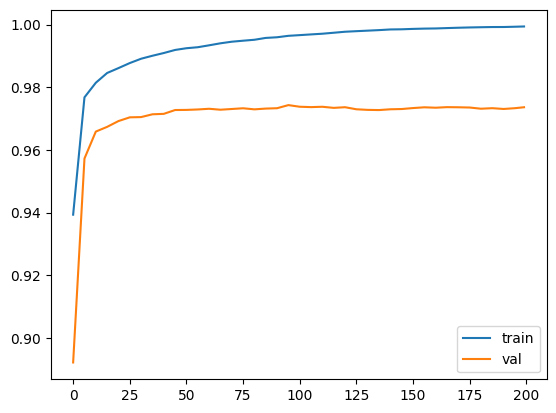

In [137]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# XGBoost parameter tuning

In [147]:
scores = {}

In [181]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'gpu_id': 0,
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  verbose_eval=5,
                  evals=watchlist)

In [182]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [183]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.3', 'eta=0.1', 'eta=0.05', 'eta=1'])

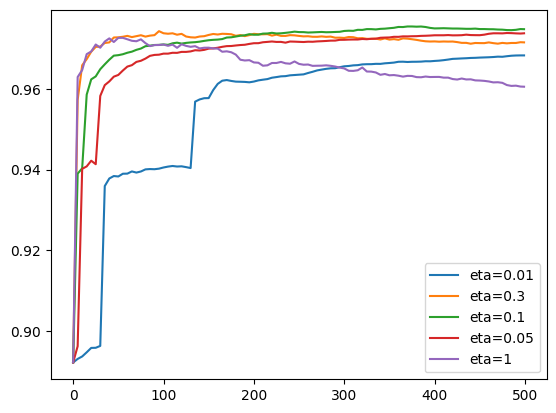

In [184]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [185]:
scores = {}

In [222]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'gpu_id': 0,
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  verbose_eval=5,
                  evals=watchlist)

In [223]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [224]:
scores.keys()

dict_keys(['max_depth=10', 'max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=8'])

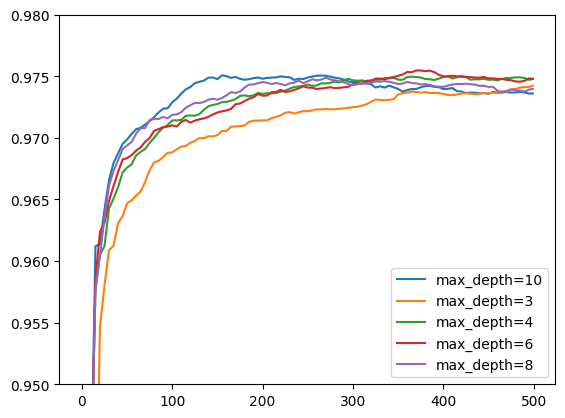

In [231]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.ylim(0.95, 0.98)
plt.legend()

In [232]:
scores = {}

In [245]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 2,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'gpu_id': 0,
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  verbose_eval=5,
                  evals=watchlist)

In [246]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=2'

In [247]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30', 'min_child_weight=2'])

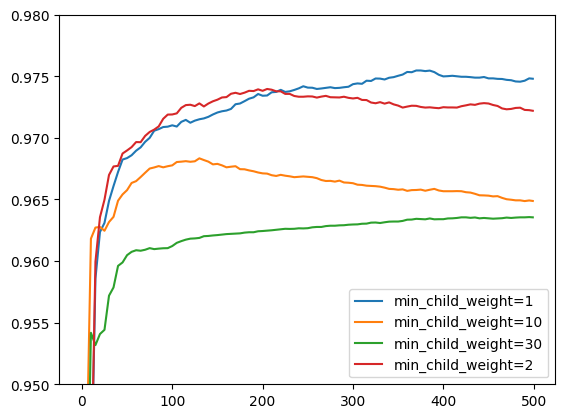

In [248]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.ylim(0.95, 0.98)
plt.legend()

In [252]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'gpu_id': 0,
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=375)

y_val_pred_proba = xgb_model.predict(dval)

auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC Score for XGBoost (GPU): {auc}")

AUC Score for XGBoost (GPU): 0.9754891722230511


Confusion Matrix:
[[5495   20]
 [  62   17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5515
           1       0.46      0.22      0.29        79

    accuracy                           0.99      5594
   macro avg       0.72      0.61      0.64      5594
weighted avg       0.98      0.99      0.98      5594


AUC Score: 0.9754891722230511


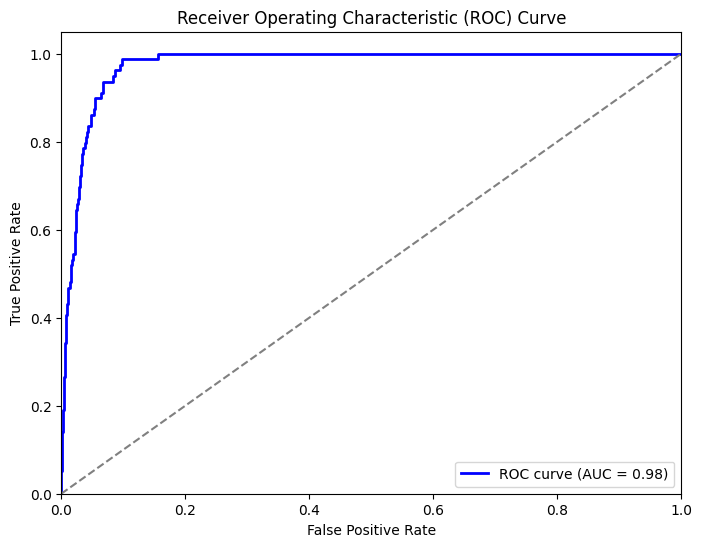

In [262]:
y_val_pred = (y_val_pred_proba >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

auc_score = roc_auc_score(y_val, y_val_pred_proba)
print(f"\nAUC Score: {auc}")

fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc_score

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression with SMOTE:

Logistic Regression with SMOTE gave the best results due to its ability to effectively handle class imbalance. SMOTE (Synthetic Minority Over-sampling Technique) generated synthetic samples for the minority class, improving the model's understanding of that class. Logistic Regression, being a simpler model, responded well to this balancing technique, leading to better recall and F1-score for class 1 (anime success predictor). The model, without the added complexity of hyperparameter tuning, performed well with this straightforward approach, enhancing its ability to predict class 1 more accurately.

In [305]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [306]:
log_reg_resampled = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [307]:
# Predict using the logistic regression model
y_pred = log_reg_resampled.predict(X_val)
y_pred_proba = log_reg_resampled.predict_proba(X_val)[:, 1]

In [308]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

auc = roc_auc_score(y_val, y_pred_proba)
print(f"\nAUC Score: {auc}")

Confusion Matrix:
[[5388  127]
 [  23   56]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5515
           1       0.31      0.71      0.43        79

    accuracy                           0.97      5594
   macro avg       0.65      0.84      0.71      5594
weighted avg       0.99      0.97      0.98      5594


AUC Score: 0.9740316972124355


In [319]:
df_full_train = df_full_train.reset_index(drop=True)

In [320]:
y_full_train = df_full_train.success.values

In [321]:
del df_full_train['success']

In [322]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [323]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_full_train, y_full_train)

In [324]:
log_reg_resampled = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

/home/starlord/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [325]:
# Predict using the logistic regression model
y_pred = log_reg_resampled.predict(X_test)
y_pred_proba = log_reg_resampled.predict_proba(X_test)[:, 1]

In [326]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

auc = roc_auc_score(y_val, y_pred_proba)
print(f"\nAUC Score: {auc}")

Confusion Matrix:
[[5284  231]
 [  77    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5515
           1       0.01      0.03      0.01        79

    accuracy                           0.94      5594
   macro avg       0.50      0.49      0.49      5594
weighted avg       0.97      0.94      0.96      5594


AUC Score: 0.4902842650079759


In [327]:
dtrain = xgb.DMatrix(X_full_train, label=y_full_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [328]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'gpu_id': 0,
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=375)

y_test_pred_proba = xgb_model.predict(dtest)

auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC Score for XGBoost (GPU): {auc}")

AUC Score for XGBoost (GPU): 0.9726300064599483


Confusion Matrix:
[[5489   15]
 [  71   19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5504
           1       0.56      0.21      0.31        90

    accuracy                           0.98      5594
   macro avg       0.77      0.60      0.65      5594
weighted avg       0.98      0.98      0.98      5594


AUC Score: 0.9726300064599483


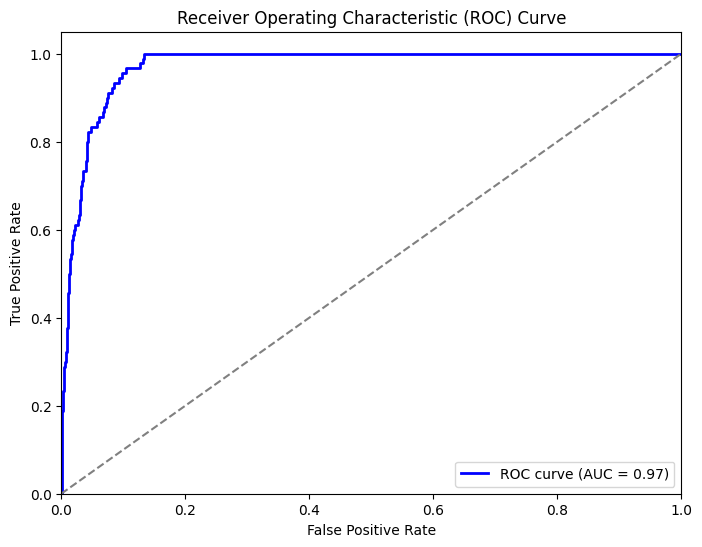

In [329]:
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

auc_score = roc_auc_score(y_test, y_test_pred_proba)
print(f"\nAUC Score: {auc}")

fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc_score

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression with SMOTE vs. XGBoost: A Comparison of Performance

1. **Logistic Regression with SMOTE**:  
   Initially, I used Logistic Regression with SMOTE (Synthetic Minority Over-sampling Technique) to address the class imbalance. SMOTE effectively generated synthetic samples for the minority class, allowing the model to better learn the characteristics of the minority class (anime success predictor). Logistic Regression, being a simpler model, benefited from this balancing technique, improving recall and F1-score for class 1.

   However, despite this approach showing promise during training, when tested on unseen data, the model performed poorly, particularly on class 1 (anime success predictor). The lack of complexity in the Logistic Regression model resulted in an inability to capture more intricate patterns in the data, leading to significant underperformance.

2. **XGBoost Performance**:  
   After observing the poor performance of Logistic Regression on the test data, I switched to using XGBoost, which is a more complex and flexible model capable of capturing non-linear relationships and feature interactions better than logistic regression. XGBoost has inherent advantages in handling imbalanced datasets, especially with parameters like `scale_pos_weight` and the ability to tune hyperparameters effectively.

   Despite starting with default settings, XGBoost showed significantly better results on the test set. The model handled the class imbalance more effectively, and its ability to capture non-linear interactions helped improve the performance, especially for the minority class. 

3. **Why XGBoost Worked Better**:  
   XGBoost outperformed Logistic Regression because it is better suited to complex datasets with non-linear relationships. While Logistic Regression struggles with class imbalance (even with SMOTE) due to its linear nature, XGBoost's decision tree-based approach allowed it to better understand and predict the minority class (class 1 in this case). XGBoost is also less prone to underfitting and can benefit from more extensive hyperparameter tuning.

4. **Conclusion**:  
   Logistic Regression with SMOTE initially appeared promising but failed to generalize well to the test data. On the other hand, XGBoost provided a more robust solution, effectively handling class imbalance and capturing complex patterns. While Logistic Regression is a useful and interpretable model, XGBoost's complexity and flexibility made it the better choice for this problem.